In [21]:
######################
# import pacakge
######################
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
#get_ipython().run_line_magic('matplotlib', 'ipympl')
#%matplotlib widget
import os
import FEA_analysis
from datetime import timedelta
from datetime import date
from scipy.signal import find_peaks


# FEA vacuum conditioning run (240827_4FEA_vac)

In [22]:
##########################
#importing folder folder
##########################

cols = ['timestamp','ch', 'VMON','IMON', 'RAMPINGUP', 'RAMPINGDOWN', 'VSET', 'ISET']
FEA_test_dir = '240827_4FEA_vac' 
FEA_data = '240827_4FEA_vac'
OS = 'linux'

all_df_caen1, all_df_caen2, ctc_100 = FEA_analysis.import_caen_data(FEA_test_dir, FEA_data, cols, OS)

#windows
#caenlogfolder = 'd:\\data\\kamioka-data\\CAEN_logs\\'

In [23]:
from FEA_analysis import total_charge

t_start = '24/08/28-14:40:01'
t_end = '24/08/28-15:50:00'

t_start2 = '24/09/24-17:40:01'
t_end2 = '24/09/24-17:50:02'

today = datetime.today()

result_caen1 = [total_charge(all_df_caen1[0], t_start, t_end), total_charge(all_df_caen1[1], t_start, t_end), total_charge(all_df_caen1[2], t_start, t_end), total_charge(all_df_caen1[3], t_start, t_end)]
result_caen2 = [total_charge(all_df_caen2[0], t_start, t_end), total_charge(all_df_caen2[1], t_start, t_end), total_charge(all_df_caen2[2], t_start, t_end), total_charge(all_df_caen2[3], t_start, t_end)]


charge_1 = [result_caen1[i][0] for i in range(0, len(all_df_caen1))]
charge_2 = [result_caen2[i][0] for i in range(0, len(all_df_caen2))]

charge = {'int_C1HV0':charge_1[0], 'int_C1HV1':charge_1[1], 'int_C1HV2':charge_1[2], 'int_C1HV3':charge_1[3], 'int_C2HV0':charge_2[0], 'int_C2HV1':charge_2[1], 'int_C2HV2':charge_2[2], 'int_C2HV3':charge_2[3]}

mean_current_1 = [result_caen1[i][1] for i in range(0, len(all_df_caen1))]
mean_current_2 = [result_caen2[i][1] for i in range(0, len(all_df_caen2))]

corr_all_caen1 = [result_caen1[i][2] for i in range(0, len(all_df_caen1))]
corr_all_caen2 = [result_caen2[i][2] for i in range(0, len(all_df_caen2))]


print(f'\ncharge of caen1 HV0 is {charge_1[0]} uC'
      f'\ncharge of caen1 HV1 is {charge_1[1]} uC'
      f'\ncharge of caen1 HV2 is {charge_1[2]} uC'
      f'\ncharge of caen1 HV3 is {charge_1[3]} uC\n'
      f'\ncharge of caen2 HV0 is {charge_2[0]} uC'
      f'\ncharge of caen2 HV1 is {charge_2[1]} uC'
      f'\ncharge of caen2 HV2 is {charge_2[2]} uC'
      f'\ncharge of caen2 HV3 is {charge_2[3]} uC\n'

      f'last updated {today}\n')

current used to baseline correction is 0.004026368068251066
current used to baseline correction is 0.0031339061547836686
current used to baseline correction is -0.004874960390006094
current used to baseline correction is 0.012808592321755026
current used to baseline correction is 0.0006393658536585366
current used to baseline correction is 0.00399180487804878
current used to baseline correction is -0.0024626524390243903
current used to baseline correction is 0.005017756097560976

charge of caen1 HV0 is 0 uC
charge of caen1 HV1 is 0 uC
charge of caen1 HV2 is 0 uC
charge of caen1 HV3 is 0 uC

charge of caen2 HV0 is 0 uC
charge of caen2 HV1 is 0 uC
charge of caen2 HV2 is 0 uC
charge of caen2 HV3 is 0 uC
last updated 2024-12-27 21:27:58.209577



## separate in a df for each FEA
df_F0003 = corr_all_caen1[3]\
df_F0004 = corr_all_caen1[2]\
df_F0005 = corr_all_caen2[3]\
df_F0008 = corr_all_caen2[2]

In [48]:
df_F0003_vac = corr_all_caen1[3]
df_F0004_vac = corr_all_caen1[2]
df_F0005_vac = corr_all_caen2[3]
df_F0008_vac = corr_all_caen2[2]
FEA = ['FEA0003', 'FEA0004', 'FEA0005', 'FEA0008']

df_F0003_vac = df_F0003_vac.reset_index(drop=True)
df_F0004_vac = df_F0004_vac.reset_index(drop=True)
df_F0005_vac = df_F0005_vac.reset_index(drop=True)
df_F0008_vac = df_F0008_vac.reset_index(drop=True)

## plots

In [49]:
df_F0003_vac.loc[df_F0003_vac['ch']==3, 'FEA'] = FEA[0]
df_F0004_vac.loc[df_F0004_vac['ch']==2, 'FEA'] = FEA[1]
df_F0005_vac.loc[df_F0005_vac['ch']==3, 'FEA'] = FEA[2]
df_F0008_vac.loc[df_F0008_vac['ch']==2, 'FEA'] = FEA[3]

df_F0003_vac

,timestamp,IMON,VMON,VSET,ISET,caen,ch,RUP,RDW,FEA
0,24/08/28-11:34:25,-0.000059,2.70,0.0,2.1,1,3,no,no,FEA0003
1,24/08/28-11:34:28,-0.000069,2.70,0.0,2.1,1,3,no,no,FEA0003
2,24/08/28-11:34:30,-0.000069,2.70,0.0,2.1,1,3,no,no,FEA0003
3,24/08/28-11:34:33,-0.000059,2.70,0.0,2.1,1,3,no,no,FEA0003
4,24/08/28-11:34:35,-0.000069,2.70,0.0,2.1,1,3,no,no,FEA0003
...,...,...,...,...,...,...,...,...,...,...
355942,24/09/10-14:17:58,-0.000069,2.55,940.0,2.1,1,3,no,no,FEA0003
355943,24/09/10-14:18:00,-0.000059,2.55,940.0,2.1,1,3,no,no,FEA0003
355944,24/09/10-14:18:03,-0.000039,2.55,940.0,2.1,1,3,no,no,FEA0003
355945,24/09/10-14:18:06,-0.000039,2.55,940.0,2.1,1,3,no,no,FEA0003


### charge plot

/tmp/ipykernel_15254/1810530754.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[peaks]['IMON'] = 0


0.004118590689063284


<Figure size 1280x960 with 0 Axes>

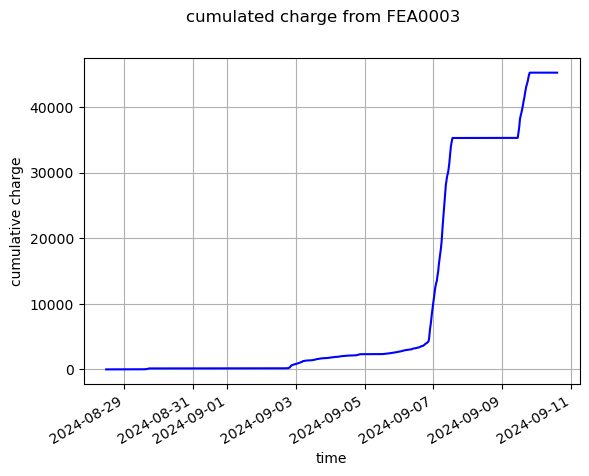

In [59]:
# cuts

df = df_F0003_vac.copy()

df = FEA_analysis.cumulated_charge(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
df.iloc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0003_vac = FEA_analysis.cumulated_charge(df)

df = cum_df_F0003_vac.copy()
#print(cum_df_F0003_vac)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0003_vac['timestamp']))

                timestamp      IMON  VMON   VSET  ISET  caen  ch RUP RDW  \
0       24/08/28-11:34:25  0.000065   1.5    0.0   2.1     1   2  no  no   
1       24/08/28-11:34:28  0.000055   1.5    0.0   2.1     1   2  no  no   
2       24/08/28-11:34:30  0.000055   1.5    0.0   2.1     1   2  no  no   
3       24/08/28-11:34:33  0.000055   1.5    0.0   2.1     1   2  no  no   
4       24/08/28-11:34:35  0.000055   1.5    0.0   2.1     1   2  no  no   
...                   ...       ...   ...    ...   ...   ...  ..  ..  ..   
355942  24/09/10-14:17:58  0.000035   1.5  900.0   2.1     1   2  no  no   
355943  24/09/10-14:18:00  0.000035   1.5  900.0   2.1     1   2  no  no   
355944  24/09/10-14:18:03  0.000055   1.5  900.0   2.1     1   2  no  no   
355945  24/09/10-14:18:06  0.000055   1.5  900.0   2.1     1   2  no  no   
355946  24/09/10-14:18:08  0.000045   1.5  900.0   2.1     1   2  no  no   

            FEA  cumulatedCharge  
0       FEA0004         0.000130  
1       FEA0004  

<Figure size 1280x960 with 0 Axes>

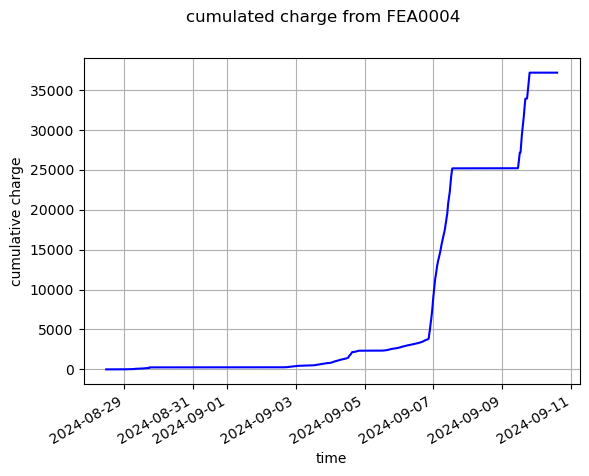

In [53]:
# cuts

df = df_F0004_vac.copy()

df = FEA_analysis.cumulated_charge(df)
print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0004_vac = FEA_analysis.cumulated_charge(df)

cum_df_F0004_vac.reset_index(drop=True)

df = cum_df_F0004_vac.copy()
print(df)

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0004_vac['timestamp']))

0.004228019933704696


<Figure size 1280x960 with 0 Axes>

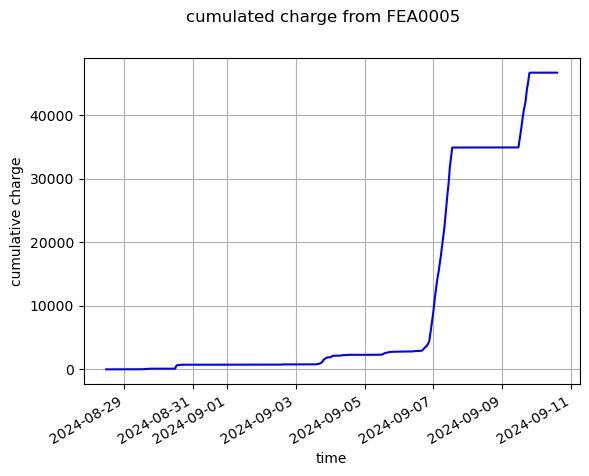

In [56]:
# cuts

df = df_F0005_vac.copy()

df = FEA_analysis.cumulated_charge(df)
#print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0005_vac = FEA_analysis.cumulated_charge(df)

cum_df_F0005_vac

df = cum_df_F0005_vac.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0005_vac['timestamp']))

0.001648927774144826


<Figure size 1280x960 with 0 Axes>

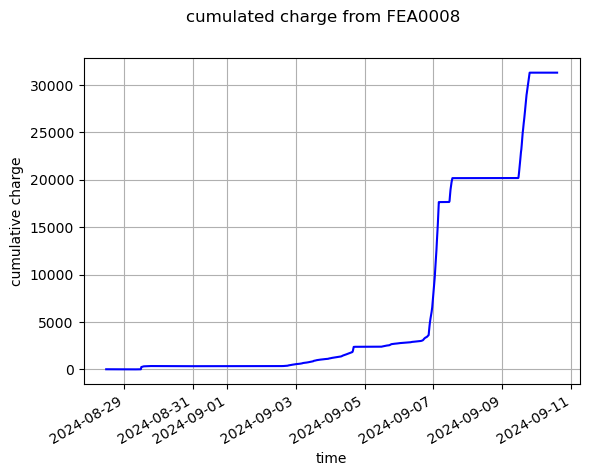

In [58]:
# cuts

df = df_F0008_vac.copy()

df = FEA_analysis.cumulated_charge(df)
#print(df)

df.loc[df.VMON < 100, 'IMON'] = 0

x = df['IMON']
peaks, _ = find_peaks(x, threshold=[0.15,None])
df= df.drop(peaks)
#df.loc[peaks]['IMON'] = 0
#print(df.loc[peaks]['IMON'])
df = df.reset_index(drop=True)

x = df['VMON']
peaks, _ = find_peaks(x,threshold=[None,0.14])
df = df.drop(peaks)
df = df.reset_index(drop=True)

cum_df_F0008_vac = FEA_analysis.cumulated_charge(df)

cum_df_F0008_vac

df = cum_df_F0008_vac.copy()

plt.figure(dpi=200)
fig, ax1 = plt.subplots(1,1, sharex='col')

FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['cumulatedCharge'].tolist(),'-',color='blue',  label= 'cumulative charge', markersize=1)

ts1 = '24/12/16-18:30:11'
te1 = '24/12/16-21:30:21'
#ax1.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

fig.suptitle(f'cumulated charge from {FEA_name}')
ax1.set_ylabel('cumulative charge')
ax1.set_xlabel('time')
ax1.grid()


#print(df_cut['timestamp'].loc[df_cut['cumulatedCharge'] == max(df_cut['cumulatedCharge'])])

#annot_max(df_cut)

plt.gcf().autofmt_xdate()


print(1 - len(df['timestamp'])/len(df_F0008_vac['timestamp']))

### plot of entire run

<Figure size 1280x960 with 0 Axes>

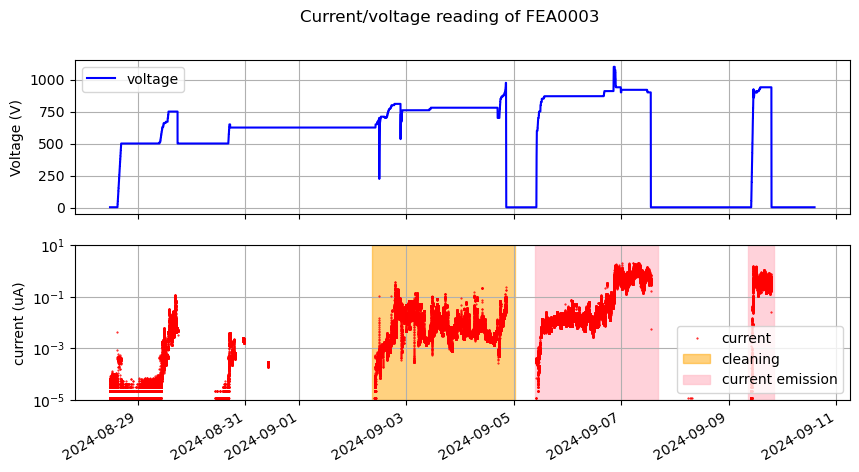

In [26]:
# plot of the entire run

df = df_F0003_vac.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))
FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)

# time period with current emission
ts1 = '24/09/02-08:35:11'
te1 = '24/09/05-00:18:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.5, color='orange', label = 'cleaning')

ts2 = '24/09/05-09:35:11'
te2 = '24/09/07-16:18:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

<Figure size 1280x960 with 0 Axes>

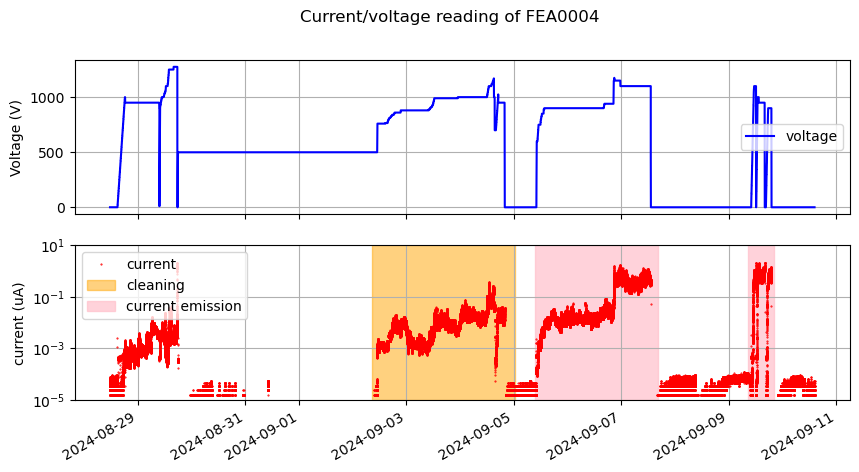

In [27]:
# plot of the entire run

df = df_F0004_vac.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))
FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)

# time period with current emission
ts1 = '24/09/02-08:35:11'
te1 = '24/09/05-00:18:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.5, color='orange', label = 'cleaning')

ts2 = '24/09/05-09:35:11'
te2 = '24/09/07-16:18:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

<Figure size 1280x960 with 0 Axes>

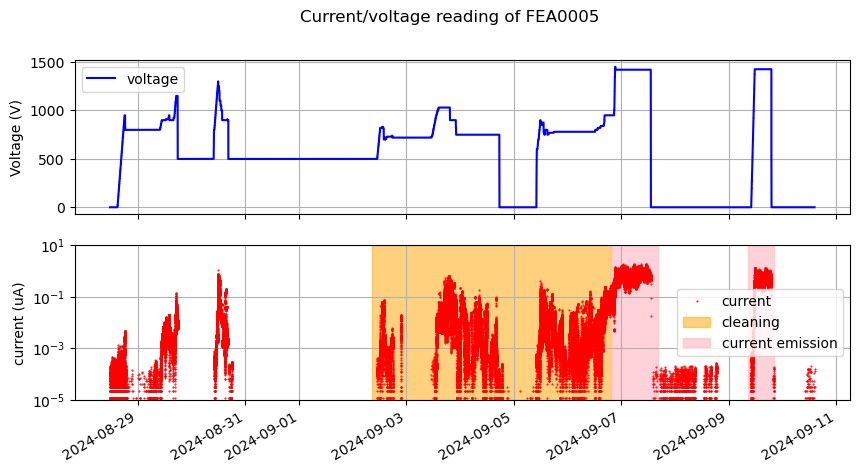

In [28]:
# plot of the entire run

df = df_F0005_vac.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))
FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)

# time period with current emission
ts1 = '24/09/02-08:35:11'
te1 = '24/09/06-19:18:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.5, color='orange', label = 'cleaning')

ts2 = '24/09/06-19:35:11'
te2 = '24/09/07-16:18:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

<Figure size 1280x960 with 0 Axes>

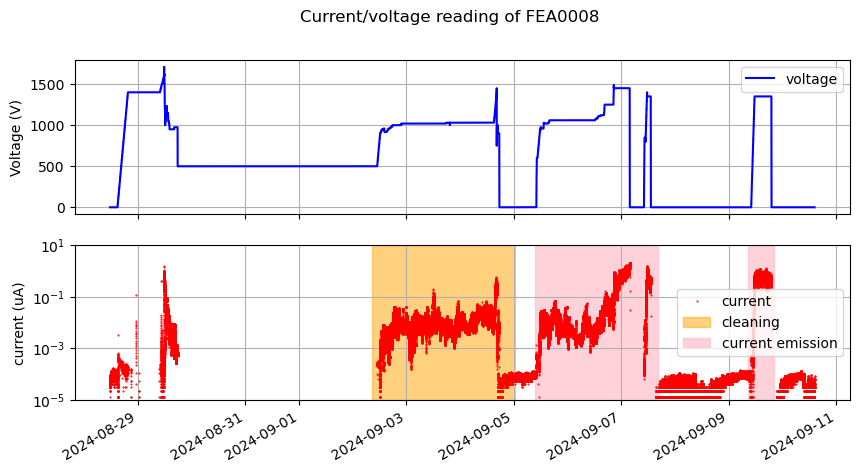

In [29]:
# plot of the entire run

df = df_F0008_vac.copy()

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col', figsize=(10, 5))
FEA_name = df.FEA.iloc[0]

datetime_list = []
for d in df.timestamp.tolist():
    datetime_list.append(datetime.strptime(d, '%y/%m/%d-%H:%M:%S'))

ax1.plot(datetime_list, df['VMON'].tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(datetime_list, df['IMON'].tolist(),'.',color='red', label='current', markersize=1)

# time period with current emission
ts1 = '24/09/02-08:35:11'
te1 = '24/09/05-00:18:21'
ax2.axvspan(datetime.strptime(ts1, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te1, '%y/%m/%d-%H:%M:%S'), alpha=0.5, color='orange', label = 'cleaning')

ts2 = '24/09/05-09:35:11'
te2 = '24/09/07-16:18:21'
ax2.axvspan(datetime.strptime(ts2, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te2, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink', label = 'current emission')

ts3 = '24/09/09-08:35:11'
te3 = '24/09/09-20:18:21'
ax2.axvspan(datetime.strptime(ts3, '%y/%m/%d-%H:%M:%S'), datetime.strptime(te3, '%y/%m/%d-%H:%M:%S'), alpha=0.7, color='pink')


fig.suptitle(f"Current/voltage reading of {FEA_name}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
plt.show()

In [30]:
t_start_base = '24/08/28-14:40:01'
t_end_base = '24/08/28-15:50:00'

t_start = '24/09/05-09:35:11'
t_end = '24/09/07-16:18:21'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0004 = FEA_analysis.partial_charge(df_F0004_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0004.loc[new_df_F0004['ch']==2, 'FEA'] = FEA[1]

new_df_F0008 = FEA_analysis.partial_charge(df_F0008_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0008.loc[new_df_F0008['ch']==2, 'FEA'] = FEA[3]



current used to baseline correction is 1.382704635330691e-18
current used to baseline correction is -2.6084278957786543e-19
current used to baseline correction is -2.432843899235766e-20


### plot of the first current emission period

<Figure size 1280x960 with 0 Axes>

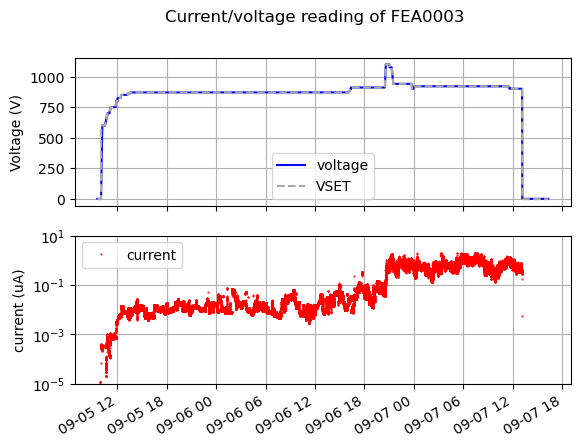

In [11]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

<Figure size 1280x960 with 0 Axes>

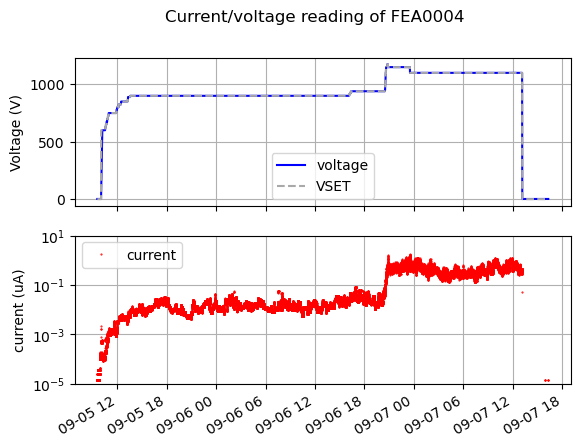

In [12]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is -1.4755727127973452e-19


<Figure size 1280x960 with 0 Axes>

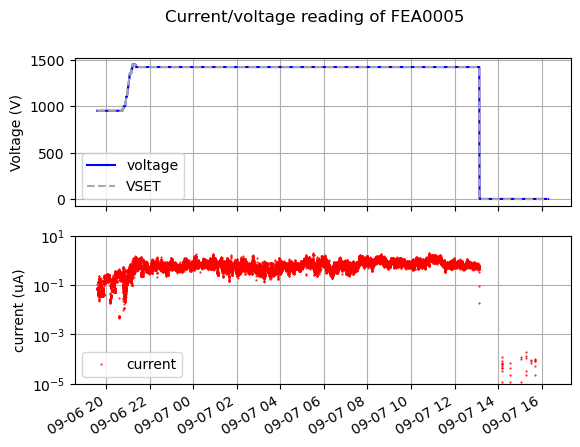

In [13]:
t_start_base = '24/08/28-14:40:01'
t_end_base = '24/08/28-15:50:00'

t_start = '24/09/06-19:35:11'
t_end = '24/09/07-16:18:21'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==3, 'FEA'] = FEA[2]

########################################################################################################

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005.copy()

for dt in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(dt, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

<Figure size 1280x960 with 0 Axes>

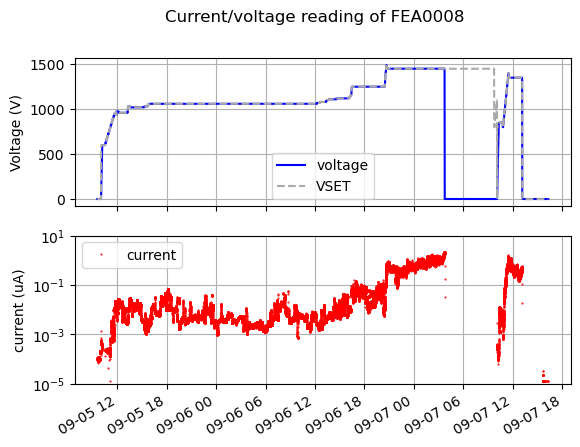

In [14]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0008.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)
ax1.plot(date_caen1, df.VSET.tolist(), '--', color='darkgrey', label='VSET')

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

### plot of the second emission period

In [15]:
t_start = '24/09/09-08:35:11'
t_end = '24/09/09-20:18:21'

t_start_base = '24/08/28-14:40:01'
t_end_base = '24/08/28-15:50:00'

new_df_F0003 = FEA_analysis.partial_charge(df_F0003_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0003.loc[new_df_F0003['ch']==3, 'FEA'] = FEA[0]

new_df_F0004 = FEA_analysis.partial_charge(df_F0004_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0004.loc[new_df_F0004['ch']==2, 'FEA'] = FEA[1]

new_df_F0005 = FEA_analysis.partial_charge(df_F0005_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==3, 'FEA'] = FEA[2]

new_df_F0008 = FEA_analysis.partial_charge(df_F0008_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0008.loc[new_df_F0008['ch']==2, 'FEA'] = FEA[3]


current used to baseline correction is -1.4563701771346792e-21
current used to baseline correction is -1.697162907112821e-21
current used to baseline correction is -1.668241719287433e-21
current used to baseline correction is 1.0112747016609268e-21


<Figure size 1280x960 with 0 Axes>

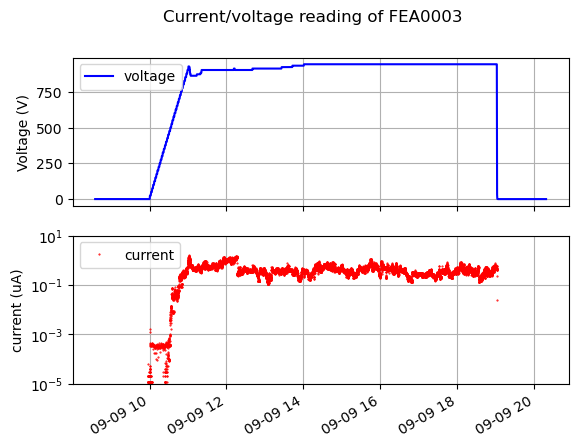

In [16]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0003.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

<Figure size 1280x960 with 0 Axes>

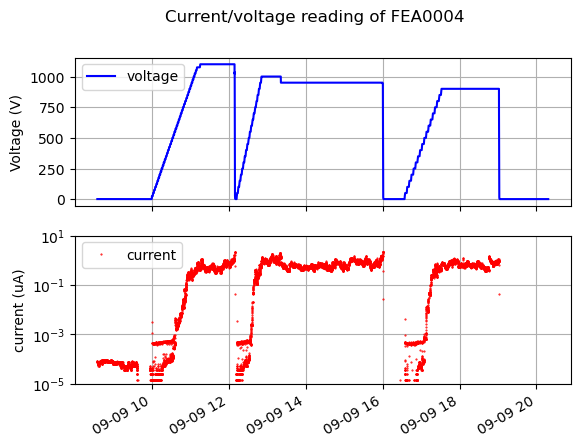

In [17]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0004.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

current used to baseline correction is -1.4544175484561645e-21


<Figure size 1280x960 with 0 Axes>

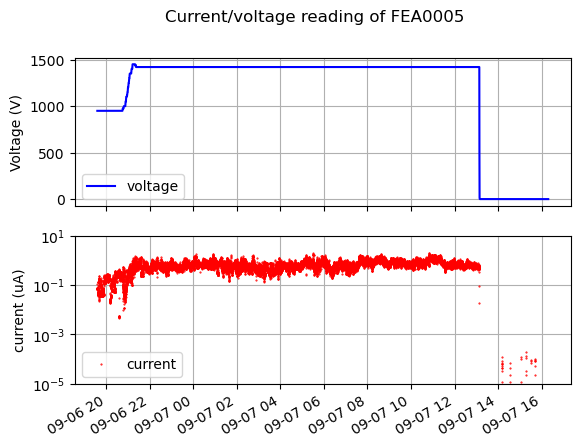

In [18]:
t_start_base = '24/08/28-14:40:01'
t_end_base = '24/08/28-15:50:00'

t_start = '24/09/06-19:35:11'
t_end = '24/09/07-16:18:21'

new_df_F0005 = FEA_analysis.partial_charge(df_F0005_vac, t_start, t_end, t_start_base, t_end_base)
new_df_F0005.loc[new_df_F0005['ch']==3, 'FEA'] = FEA[2]

########################################################################################################

plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0005.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

<Figure size 1280x960 with 0 Axes>

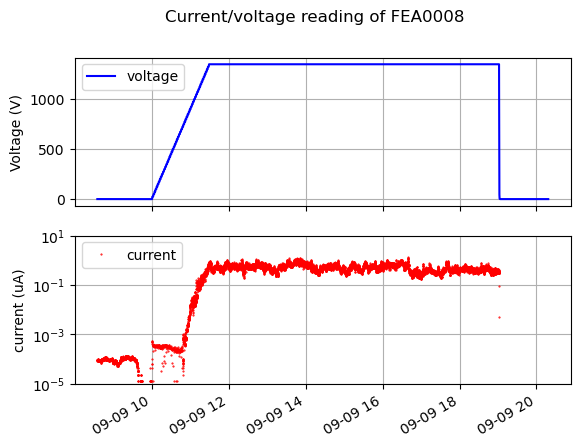

In [19]:
plt.figure(dpi=200)
fig, (ax1, ax2) = plt.subplots(2,1, sharex='col')

date_caen1 = []
df = new_df_F0008.copy()

for date in df.timestamp.tolist():
    date_caen1.append(datetime.strptime(date, '%y/%m/%d-%H:%M:%S'))

ax1.plot(date_caen1, df.VMON.tolist(),'-',color='blue',  label= 'voltage', markersize=1)
ax2.plot(date_caen1, df.IMON.tolist(),'.',color='red', label='current', markersize=1)

fig.suptitle(f"Current/voltage reading of {df.FEA[0]}")
ax1.set_ylabel('Voltage (V)')
ax2.set_ylabel('current (uA)')
#ax1.set_yscale('log')
ax2.set_yscale('log')
#ax1.set_ylim(300)
ax2.set_ylim([1e-5, 10])
ax1.grid()
ax2.grid()
ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()

## end of analysis of vac conditioning test